Code adapted from example provided by Navlani (2024).

In [ ]:
!pip install skl2onnx

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import tree
from skl2onnx import to_onnx

from google.colab import drive

drive.mount('/content/drive/')
path = 'replace with path to folder with data files/' #Defining the path

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
col_names = ['CH1','LABEL']
csvData = pd.read_csv(path+"SensorData.csv", header=None, names=col_names)

sensors = ['CH1']  # The channel containing sensor data, i.e. the independent variables
X = csvData[sensors] # The independent variables (i.e. the EMG signals) from each channel that reflect either rest or muscle activation
Y = csvData.LABEL # The dependent variable, which states whether the corresponding data is 'positive' or 'negative'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # 80% training and 20% test

K_neighbour = KNeighborsClassifier(n_neighbors = 5) # Creates the KNN classifier object



In [ ]:
K_neighbour.fit(X_train,Y_train)  # Trains the KNN classifier on the training dataset

# This block of code saves the model to an ONNX file in the same drive folder as the data files.
# Code based on documentation example (ONNX, n.d.)
onx = to_onnx(K_neighbour, X[:1])
with open(path+"nneighbour.onnx", "wb") as f:
    f.write(onx.SerializeToString())

Accuracy: 0.9473227834381097


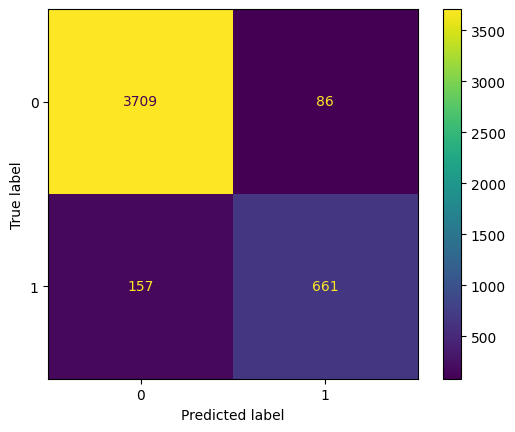

In [ ]:
Y_pred = K_neighbour.predict(X_test)  # Tests the data against the test dataset


cf = confusion_matrix(Y_test, Y_pred, labels=K_neighbour.classes_)  # Creates a confusion matrix object using the test results
conf_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = K_neighbour.classes_) # Loads the confusion matrix into a display

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) # Displays prediction accuracy
conf_display.plot() # Plots the confusion matrix

Bibliography:

Navlani, A 2024, *Decision Tree Classification in Python Tutorial*, datacamp, viewed 28 October 2024, https://www.datacamp.com/tutorial/decision-tree-classification-python

ONNX n.d., *sklearn-onnx: Convert your scikit-learn model into ONNX*,
sklearn-onnx, viewed 28 October 2024, https://onnx.ai/sklearn-onnx/index.html